# Average Baseline + Linear Regression

This notebook inclues the Average Baseline Model and the Linear Regression Model.

The sections are:<br>
-Data Cleaning <br>
-Linear Regression <br>
-Average Baseline <br>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

2023-04-13 08:01:38.276090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Cleaning

In [2]:
df_raw = pd.read_csv('games-features.csv')

In [3]:
df_raw.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


### Selecting rows and columns used for analysis

In [4]:
df_raw.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

In [5]:
df_all = df_raw[['QueryName', 'Metacritic',
         #Genre variables
        'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 
         'GenreIsCasual','GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
         #Category variables
        'CategorySinglePlayer','CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport',
         #Platform variables
        'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec',
         #Additional Info
        'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount',
        'MovieCount', 'PackageCount', 'RecommendationCount', 
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance','SteamSpyPlayersEstimate', 
         'SteamSpyPlayersVariance','AchievementCount', 'ControllerSupport', 'FreeVerAvail', 
         'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal',
         #Variables that need transformation
         'ReleaseDate', 'SupportedLanguages', 
         #Text variables
         'Reviews','DetailedDescrip','AboutText']]

In [6]:
df = df_all[df_all['Metacritic']>0]

### Dropping Duplicates

In [7]:
df = df.drop_duplicates()

In [8]:
df_vc = pd.DataFrame(df['QueryName'].value_counts())
df_vc[df_vc['QueryName']>1]

,QueryName
Sid Meier's Civilization IV: Colonization,2
Monday Night Combat,2
Fallout: New Vegas,2
Darksiders,2
Alpha Protocol,2
Sid Meier's Civilization V,2
Sid Meier's Civilization IV: Beyond the Sword,2
Sid Meier's Civilization IV: Warlords,2
Arma 2,2
Sid Meier's Civilization IV,2


In [9]:
#drop Sid Meier's Civilization IV: Colonization dup 
df=df.drop(965)
#drop Fallout: New Vegas dup
df=df.drop(952)
#drop Sid Meier's Civilization V dup
df=df.drop(1205)
#drop Darksiders dup
df=df.drop(1210)
#drop Sid Meier's Civilization IV dup
df=df.drop(962)
#Drop Monday night combat dup
df=df.drop(1278)
#Drop Sid Meier's Civilization IV: Beyond the Sword dup
df=df.drop(964)
#Drop Sid Meier's Civilization IV: Warlords dup
df=df.drop(963)
#Drop Arma 2 dup
df=df.drop(782)
#Drop Alpha Protocol dup
df=df.drop(961)

### Cleaning Languages

In [10]:
import re
pd.set_option('display.max_rows', None)
languages = df['SupportedLanguages'].tolist()

#Split to check all languages
split_lst = []
for language in languages:
    split_lang = re.split('\* |\*|\s|\*\*', language)
    for lang in split_lang:
        split_lst.append(lang)

split_series = pd.Series(split_lst)
split_df = pd.DataFrame(split_series.value_counts())
#split_df[split_df[0]>0]
#lang_list= split_df.index.values.tolist()
#print(lang_list)

In [11]:
#Create list of all possible languages
language_list=['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']

In [12]:
#Create boolean columns for each language
for language in language_list:
    df[language]=df['SupportedLanguages'].str.contains(language)

In [13]:
#create boolean column for audio support (will delete later, using this as reference to check regex)
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==True, 'audio_support?'] = 1
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==False, 'audio_support?'] = 0

In [14]:
#Create transformed language columns without "languages with full audio support" statement
df['transformed']= df['SupportedLanguages'].str.extract("(.+?)\*languages with full audio support")

In [15]:
#Count * in transformed column to count number of languages with audio support
df['num_lang_audio_support']=df['transformed'].str.count('\*')
df['num_lang_audio_support'] = df['num_lang_audio_support'].fillna(0)

In [16]:
#Convert bool to numeric and sum
df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']] = df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].replace({True: 1, False: 0})

df['num_languages']=df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].sum(axis=1)

In [17]:
#Drop columns used in transformations
df=df.drop("transformed", axis=1)
df=df.drop("audio_support?", axis=1)

In [18]:
pd.set_option('display.max_columns', None)
df.head(100)

,QueryName,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,SupportedLanguages,Reviews,DetailedDescrip,AboutText,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
0,Counter-Strike,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,Nov 1 2000,English French German Italian Spanish Simplifi...,,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
2,Day of Defeat,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,May 1 2003,English French German Italian Spanish,,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5
6,Half-Life,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,Nov 8 1998,English French German Italian Spanish Simplifi...,,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
7,Counter-Strike: Condition Zero,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,Mar 1 2004,English French German Italian Spanish Simplifi...,,With its extensive Tour of Duty campaign a nea...,With its extensive Tour of Duty campaign a nea...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
9,Half-Life: Blue Shift,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,Jun 1 2001,English French German,,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3
10,Half-Life 2,96,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False,0,1,1,1,2,2,35792,9,9901173,81234,5695963,61979,33,False,False,True,False,9.99,Nov 16 2004,English* French* German* Italian* Korean* Span...,,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1,1,1,1,1,1,1,1,0,0

### Cleaning Dates

In [19]:
#Check for dates with inaccurate format
df['ReleaseDate'][df['ReleaseDate'].str.fullmatch('[a-zA-Z]{3}\s\d*?\s\d{4}')==False]

305                Feb 2011
529                        
572                        
668                Jun 2009
687                Jul 2010
904                Sep 2009
1008                       
1180               Mar 2010
1199                       
1228               Apr 2010
1253               Jul 2010
1268               Oct 2010
1269               Oct 2010
1578                       
1856                       
1922                       
1993                       
2171                       
2183                       
2201                       
2214                       
2317               Aug 2013
3805               Nov 2014
4103               May 2015
4943               Jun 2015
12068    December 20th 2016
Name: ReleaseDate, dtype: object

In [20]:
#Convert these dates to accurate format, replace blanks with NAs
df['ReleaseDate']= df['ReleaseDate'].replace({'Oct 2010': 'Oct 1 2010', 'Jul 2010':'Jul 1 2010', 'Aug 2013': 'Aug 2013',
                          'Jun 2015': 'Jun 1 2015', 'December 20th 2016': 'Dec 20 2016',
                          'May 2015': 'May 1 2015', 'Nov 2014': 'Nov 1 2014', 'Sep 2009':'Sep 1 2009',
                          'Jun 2009': 'Jun 1 2009', 'Feb 2011':'Feb 1 2011', 'Mar 2010':'Mar 1 2010',
                          'Apr 2010': 'Apr 1 2010', 'Aug 2013': 'Aug 1 2013'})
df['ReleaseDate'] = df['ReleaseDate'].replace(r'^\s*$', np.nan, regex=True)

In [21]:
#Convert to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [22]:
#check data type
df['ReleaseDate'].dtype

dtype('<M8[ns]')

In [23]:
df.describe()

,Metacritic,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,PriceFinal,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2235.000000,2235.000000,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.00000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,72.008501,2.508277,0.186577,1.087696,1.502013,1.798210,1.680984,4.552546e+03,11.968680,5.867512e+05,13742.305145,4.127886e+05,10733.005369,26.519911,14.024385,1.0,0.607159,0.587472,0.532886,0.474273,0.351678,0.234004,0.161074,0.153020,0.085906,0.078747,0.076510,0.069799,0.05906,0.187919,0.051007,0.044743,0.036242,0.032215,0.029083,0.027740,0.015660,0.013870,0.008949,0.008949,0.008949,0.008501,0.000447,1.216555,4.945861
std,11.152135,5.984335,0.391950,0.362037,5.995998,1.829089,1.023349,3.541729e+04,7.336697,2.455699e+06,14185.781091,2.313979e+06,12541.438116,53.770134,10.488378,0.0,0.488491,0.492399,0.499029,0.499449,0.477601,0.423470,0.367681,0.360087,0.280288,0.269404,0.265872,0.254864,0.23579,0.390735,0.220061,0.206785,0.186933,0.176610,0.168076,0.164265,0.124184,0.116979,0.094194,0.094194,0.094194,0.091829,0.021152,2.172011,4.165792
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,66.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.370000e+02,8.000000,3.560100e+04,4938.000000,1.721800e+04,3434.000000,0.000000,8.365000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,73.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.180000e+02,10.000000,1.303870e+05,9449.000000,6.725600e+04,6787.000000,15.000000,9.990000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,80.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.118500e+03,14.000000,4.602110e+05,17745.000000,2.679480e+05,13543.500000,39.000000,19.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
max,96.000000,18.000000,2.000000,5.000000,169.000000,20.000000,11.000000,1.427633e+06,114.000000,9.068758e+07,215972.000000,9.068758e+07,215972.000000,1448.000000,99.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

# Linear Regression

In [24]:
#select columns to work with for linear regression
df_lr = df[['Metacritic', 'GenreIsNonGame', 'GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy',
       'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
       'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
       'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'PlatformWindows',
       'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
       'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
       'MacReqsHaveRec', 'RequiredAge', 'DemoCount', 'DeveloperCount',
       'DLCCount', 'MovieCount', 'PackageCount', 'RecommendationCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'ControllerSupport', 'FreeVerAvail',
       'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal', 'ReleaseDate',
       'English', 'German', 'French', 'Spanish', 'Italian', 'Russian',
       'Polish', 'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean',
       'Simplified Chinese', 'Dutch', 'Traditional Chinese', 'Portuguese',
       'Hungarian', 'Turkish', 'Swedish', 'Danish', 'Norwegian', 'Finnish',
       'Ukrainian', 'Romanian', 'Thai', 'Greek', 'Bulgarian', 'Arabic',
       'Slovakian', 'num_lang_audio_support']]

In [25]:
df_lr = df_lr.dropna()
df_lr.head()

,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support
0,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,2000-11-01,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,2003-05-01,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
6,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,1998-11-08,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
7,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,2004-03-01,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
9,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,2001-06-01,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [26]:
#make column for age
now = pd.to_datetime('now')
df_lr['Age']=(now - df['ReleaseDate']).dt.total_seconds() / (60*60*24*365.25)

In [27]:
#make columns for month, drop date column
#df_lr['Year'] = df_lr['ReleaseDate'].dt.year 
df_lr['Month'] = df_lr['ReleaseDate'].dt.month_name()
df_lr=df_lr.drop('ReleaseDate', axis=1)

In [28]:
#Make dummy variables for months
df_lr = pd.concat([df_lr, pd.get_dummies(df_lr['Month'])], axis=1)
df_lr = df_lr.drop('Month', axis=1)

In [29]:
#Make booleans numeric
df_lr=df_lr.replace({True: 1, False: 0})

In [30]:
#Shuffle rows
df_lr_shuffled= df_lr.sample(frac=1, random_state=1).reset_index()
df_lr_shuffled.shape

(2223, 91)

In [31]:
# select features for training
features = ['GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
        'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
        'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
        'GenreIsSports', 'GenreIsRacing', 'CategorySinglePlayer',
        'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
        'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
        'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'PlatformWindows',
        'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
        'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
        'MacReqsHaveRec', 'RequiredAge', 'DemoCount', 'DeveloperCount',
        'DLCCount', 'MovieCount', 'PackageCount', 'RecommendationCount',
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
        'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
        'AchievementCount', 'ControllerSupport', 'FreeVerAvail',
        'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal', 'English', 'German',
        'French', 'Spanish', 'Italian', 'Russian', 'Polish', 'Japanese',
        'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 'Dutch',
        'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish',
        'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai',
        'Greek', 'Bulgarian', 'Arabic', 'Slovakian', 'num_lang_audio_support',
        'Age', 'April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'October', 'September']

# Use a ~80/20 train/test split.
lr_train = df_lr_shuffled[:1835]
lr_test = df_lr_shuffled[1835:]

# Create separate variables for features (inputs) and labels (outputs).
# We will be using these in the cells below.
X_train = lr_train[features].values
X_test = lr_test[features].values
y_train = lr_train['Metacritic'].values
y_test = lr_test['Metacritic'].values

# Confirm the data shapes are as expected.
print('train data shape:', X_train.shape)
print('train labels shape:', y_train.shape)
print('test data shape:', X_test.shape)
print('test labels shape:', y_test.shape)

train data shape: (1835, 89)
train labels shape: (1835,)
test data shape: (388, 89)
test labels shape: (388,)


In [32]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [33]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1835, 89)
(388, 89)


In [34]:
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

2023-04-13 08:01:43.438413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1651/1651 [==============================] - 1s 543us/step - loss: 4881.9365 - val_loss: 3440.6843
Epoch 2/10
1651/1651 [==============================] - 1s 485us/step - loss: 3111.3853 - val_loss: 2141.7039
Epoch 3/10
1651/1651 [==============================] - 1s 481us/step - loss: 1951.0270 - val_loss: 1197.8875
Epoch 4/10
1651/1651 [==============================] - 1s 508us/step - loss: 1182.6313 - val_loss: 636.6423
Epoch 5/10
1651/1651 [==============================] - 1s 492us/step - loss: 748.8075 - val_loss: 313.5459
Epoch 6/10
1651/1651 [==============================] - 1s 488us/step - loss: 538.6337 - val_loss: 191.6376
Epoch 7/10
1651/1651 [==============================] - 1s 500us/step - loss: 454.3073 - val_loss: 142.4974
Epoch 8/10
1651/1651 [==============================] - 1s 496us/step - loss: 415.7723 - val_loss: 126.1976
Epoch 9/10
1651/1651 [==============================] - 1s 494us/step - loss: 390.1667 - val_loss: 122.5290
Epoch 10/10
1651/1651

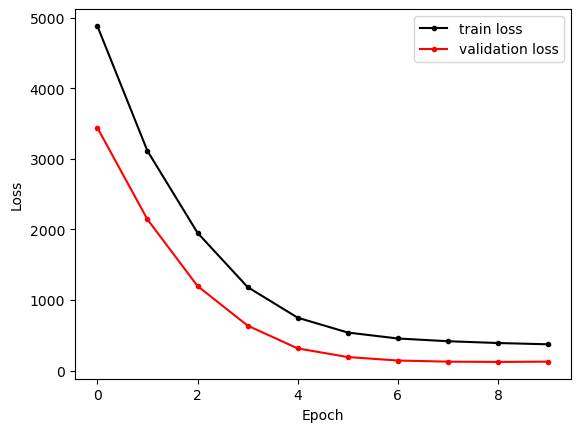

Final train loss: 372.2184753417969
Final test loss: 126.35417175292969


,loss,val_loss
0,4881.936523,3440.684326
1,3111.385254,2141.703857
2,1951.026978,1197.887451
3,1182.631348,636.642334
4,748.807495,313.545898
5,538.633728,191.637589
6,454.307343,142.497375
7,415.772308,126.197563
8,390.166687,122.528976
9,372.218475,126.354172


In [35]:
def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=10,
  batch_size=1,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

## Linear Regression Experiments

Epoch 1/10
207/207 [==============================] - 0s 954us/step - loss: 5176.2788 - val_loss: 5242.3335
Epoch 2/10
207/207 [==============================] - 0s 668us/step - loss: 4865.1602 - val_loss: 4988.5161
Epoch 3/10
207/207 [==============================] - 0s 808us/step - loss: 4583.2217 - val_loss: 4736.7739
Epoch 4/10
207/207 [==============================] - 0s 863us/step - loss: 4317.1367 - val_loss: 4491.2939
Epoch 5/10
207/207 [==============================] - 0s 725us/step - loss: 4060.3430 - val_loss: 4250.7607
Epoch 6/10
207/207 [==============================] - 0s 637us/step - loss: 3816.1162 - val_loss: 4016.2231
Epoch 7/10
207/207 [==============================] - 0s 635us/step - loss: 3585.2251 - val_loss: 3792.6746
Epoch 8/10
207/207 [==============================] - 0s 649us/step - loss: 3362.1733 - val_loss: 3583.7859
Epoch 9/10
207/207 [==============================] - 0s 833us/step - loss: 3149.2434 - val_loss: 3378.0410
Epoch 10/10
207/207 [=======

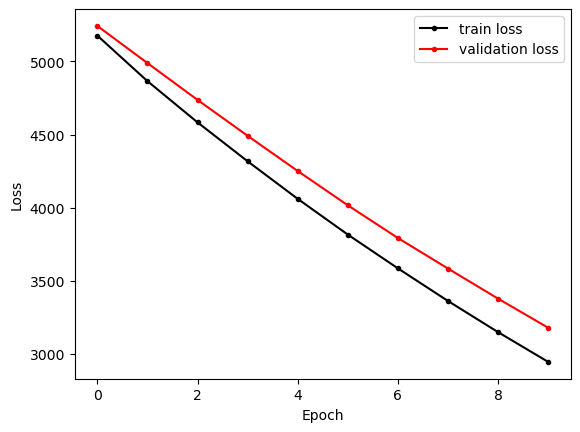

Final train loss: 2945.872314453125
Final test loss: 3179.298828125


,loss,val_loss
0,5176.278809,5242.333496
1,4865.160156,4988.516113
2,4583.221680,4736.773926
3,4317.136719,4491.293945
4,4060.343018,4250.760742
5,3816.116211,4016.223145
6,3585.225098,3792.674561
7,3362.173340,3583.785889
8,3149.243408,3378.041016
9,2945.872314,3179.298828


In [45]:
#Batch size 8
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=10,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/15
207/207 [==============================] - 0s 1ms/step - loss: 4994.7124 - val_loss: 3055.3958
Epoch 2/15
207/207 [==============================] - 0s 674us/step - loss: 2761.5391 - val_loss: 1696.4471
Epoch 3/15
207/207 [==============================] - 0s 672us/step - loss: 1553.4075 - val_loss: 909.6386
Epoch 4/15
207/207 [==============================] - 0s 695us/step - loss: 900.0331 - val_loss: 494.8164
Epoch 5/15
207/207 [==============================] - 0s 769us/step - loss: 573.8604 - val_loss: 274.4148
Epoch 6/15
207/207 [==============================] - 0s 678us/step - loss: 419.7580 - val_loss: 174.4951
Epoch 7/15
207/207 [==============================] - 0s 668us/step - loss: 341.5818 - val_loss: 147.6443
Epoch 8/15
207/207 [==============================] - 0s 653us/step - loss: 290.9355 - val_loss: 145.9585
Epoch 9/15
207/207 [==============================] - 0s 659us/step - loss: 254.8884 - val_loss: 127.3382
Epoch 10/15
207/207 [======================

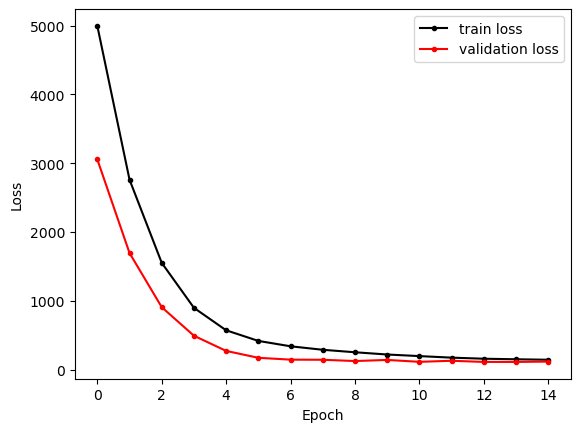

Final train loss: 146.15567016601562
Final test loss: 119.45573425292969


,loss,val_loss
0,4994.712402,3055.395752
1,2761.539062,1696.447144
2,1553.407471,909.638611
3,900.033142,494.816376
4,573.860413,274.414825
5,419.757996,174.495148
6,341.581757,147.644318
7,290.935486,145.958542
8,254.888412,127.338165
9,222.271576,143.625763


In [57]:
#Batch size 8, LR 0.1
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=15,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/60
207/207 [==============================] - 0s 978us/step - loss: 5174.8950 - val_loss: 5240.6802
Epoch 2/60
207/207 [==============================] - 0s 695us/step - loss: 4865.4805 - val_loss: 4985.6987
Epoch 3/60
207/207 [==============================] - 0s 661us/step - loss: 4583.8691 - val_loss: 4733.4995
Epoch 4/60
207/207 [==============================] - 0s 670us/step - loss: 4317.8291 - val_loss: 4487.8687
Epoch 5/60
207/207 [==============================] - 0s 855us/step - loss: 4060.8264 - val_loss: 4247.5830
Epoch 6/60
207/207 [==============================] - 0s 645us/step - loss: 3816.4197 - val_loss: 4013.2231
Epoch 7/60
207/207 [==============================] - 0s 667us/step - loss: 3585.3069 - val_loss: 3790.0513
Epoch 8/60
207/207 [==============================] - 0s 703us/step - loss: 3362.2070 - val_loss: 3581.4897
Epoch 9/60
207/207 [==============================] - 0s 671us/step - loss: 3149.1765 - val_loss: 3376.2268
Epoch 10/60
207/207 [=======

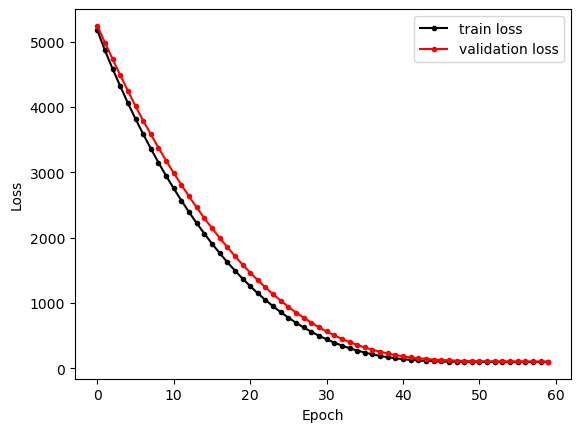

Final train loss: 97.11605834960938
Final test loss: 102.54747772216797


,loss,val_loss
0,5174.895020,5240.680176
1,4865.480469,4985.698730
2,4583.869141,4733.499512
3,4317.829102,4487.868652
4,4060.826416,4247.583008
5,3816.419678,4013.223145
6,3585.306885,3790.051270
7,3362.207031,3581.489746
8,3149.176514,3376.226807
9,2945.749023,3177.787354


In [54]:
#Batch size 8, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=60,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/35
413/413 [==============================] - 0s 747us/step - loss: 5081.7808 - val_loss: 4934.7896
Epoch 2/35
413/413 [==============================] - 0s 610us/step - loss: 4493.9507 - val_loss: 4441.0020
Epoch 3/35
413/413 [==============================] - 0s 712us/step - loss: 3982.6980 - val_loss: 3975.9937
Epoch 4/35
413/413 [==============================] - 0s 596us/step - loss: 3515.5730 - val_loss: 3544.4097
Epoch 5/35
413/413 [==============================] - 0s 624us/step - loss: 3087.4517 - val_loss: 3136.4990
Epoch 6/35
413/413 [==============================] - 0s 619us/step - loss: 2695.5364 - val_loss: 2756.8552
Epoch 7/35
413/413 [==============================] - 0s 614us/step - loss: 2343.1768 - val_loss: 2415.1355
Epoch 8/35
413/413 [==============================] - 0s 618us/step - loss: 2019.9900 - val_loss: 2107.0769
Epoch 9/35
413/413 [==============================] - 0s 599us/step - loss: 1728.2123 - val_loss: 1820.3547
Epoch 10/35
413/413 [=======

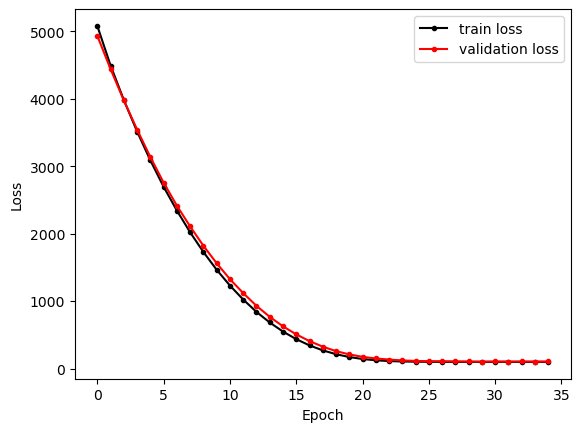

Final train loss: 98.20465087890625
Final test loss: 104.56334686279297


,loss,val_loss
0,5081.780762,4934.789551
1,4493.950684,4441.001953
2,3982.697998,3975.993652
3,3515.572998,3544.409668
4,3087.451660,3136.499023
5,2695.536377,2756.855225
6,2343.176758,2415.135498
7,2019.989990,2107.076904
8,1728.212280,1820.354736
9,1464.832886,1561.802124


In [51]:
#Batch size 4, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=35,
  batch_size=4,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/150
104/104 [==============================] - 0s 1ms/step - loss: 5229.0283 - val_loss: 5375.3638
Epoch 2/150
104/104 [==============================] - 0s 808us/step - loss: 5067.3247 - val_loss: 5251.8457
Epoch 3/150
104/104 [==============================] - 0s 819us/step - loss: 4916.7012 - val_loss: 5123.7534
Epoch 4/150
104/104 [==============================] - 0s 811us/step - loss: 4773.9780 - val_loss: 4995.4360
Epoch 5/150
104/104 [==============================] - 0s 775us/step - loss: 4630.8184 - val_loss: 4870.1289
Epoch 6/150
104/104 [==============================] - 0s 761us/step - loss: 4494.3467 - val_loss: 4744.9937
Epoch 7/150
104/104 [==============================] - 0s 759us/step - loss: 4360.5269 - val_loss: 4621.4707
Epoch 8/150
104/104 [==============================] - 0s 788us/step - loss: 4229.3135 - val_loss: 4503.6587
Epoch 9/150
104/104 [==============================] - 0s 1ms/step - loss: 4100.6572 - val_loss: 4388.0073
Epoch 10/150
104/104 [=

104/104 [==============================] - 0s 772us/step - loss: 177.5078 - val_loss: 243.8039
Epoch 77/150
104/104 [==============================] - 0s 755us/step - loss: 168.0296 - val_loss: 230.6630
Epoch 78/150
104/104 [==============================] - 0s 786us/step - loss: 159.1934 - val_loss: 218.3118
Epoch 79/150
104/104 [==============================] - 0s 782us/step - loss: 151.1464 - val_loss: 206.3857
Epoch 80/150
104/104 [==============================] - 0s 766us/step - loss: 144.1284 - val_loss: 195.8647
Epoch 81/150
104/104 [==============================] - 0s 761us/step - loss: 137.5799 - val_loss: 185.8818
Epoch 82/150
104/104 [==============================] - 0s 767us/step - loss: 131.7966 - val_loss: 177.0073
Epoch 83/150
104/104 [==============================] - 0s 767us/step - loss: 126.7007 - val_loss: 168.8486
Epoch 84/150
104/104 [==============================] - 0s 739us/step - loss: 122.0354 - val_loss: 161.7006
Epoch 85/150
104/104 [===================

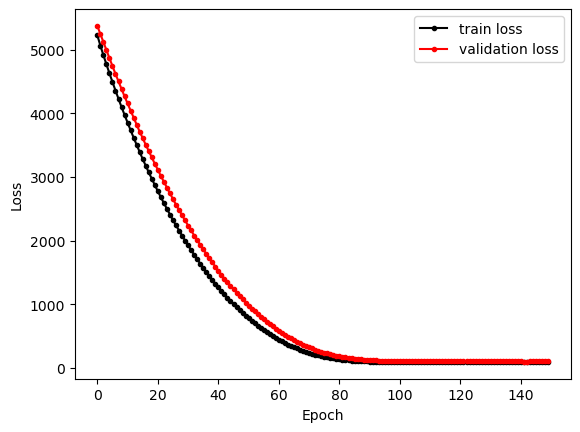

Final train loss: 96.57073211669922
Final test loss: 103.03086853027344


,loss,val_loss
0,5229.028320,5375.363770
1,5067.324707,5251.845703
2,4916.701172,5123.753418
3,4773.978027,4995.436035
4,4630.818359,4870.128906
5,4494.346680,4744.993652
6,4360.526855,4621.470703
7,4229.313477,4503.658691
8,4100.657227,4388.007324
9,3975.929443,4267.995117


In [59]:
#Batch size 16, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=150,
  batch_size=16,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/180
26/26 [==============================] - 0s 4ms/step - loss: 5050.4810 - val_loss: 5024.2324
Epoch 2/180
26/26 [==============================] - 0s 1ms/step - loss: 4552.5859 - val_loss: 4568.7720
Epoch 3/180
26/26 [==============================] - 0s 1ms/step - loss: 4107.8511 - val_loss: 4154.6025
Epoch 4/180
26/26 [==============================] - 0s 1ms/step - loss: 3709.1160 - val_loss: 3779.9790
Epoch 5/180
26/26 [==============================] - 0s 1ms/step - loss: 3350.1848 - val_loss: 3437.8125
Epoch 6/180
26/26 [==============================] - 0s 1ms/step - loss: 3026.5212 - val_loss: 3126.2302
Epoch 7/180
26/26 [==============================] - 0s 1ms/step - loss: 2736.8904 - val_loss: 2845.7488
Epoch 8/180
26/26 [==============================] - 0s 1ms/step - loss: 2474.8547 - val_loss: 2592.6260
Epoch 9/180
26/26 [==============================] - 0s 1ms/step - loss: 2239.3601 - val_loss: 2363.4282
Epoch 10/180
26/26 [==============================] - 0

26/26 [==============================] - 0s 1ms/step - loss: 97.8139 - val_loss: 112.9117
Epoch 80/180
26/26 [==============================] - 0s 1ms/step - loss: 97.6496 - val_loss: 112.4030
Epoch 81/180
26/26 [==============================] - 0s 1ms/step - loss: 97.4990 - val_loss: 111.9306
Epoch 82/180
26/26 [==============================] - 0s 1ms/step - loss: 97.3502 - val_loss: 111.4837
Epoch 83/180
26/26 [==============================] - 0s 1ms/step - loss: 97.2243 - val_loss: 111.0443
Epoch 84/180
26/26 [==============================] - 0s 1ms/step - loss: 97.0927 - val_loss: 110.6953
Epoch 85/180
26/26 [==============================] - 0s 1ms/step - loss: 96.9966 - val_loss: 110.3411
Epoch 86/180
26/26 [==============================] - 0s 1ms/step - loss: 96.8957 - val_loss: 109.9897
Epoch 87/180
26/26 [==============================] - 0s 1ms/step - loss: 96.7824 - val_loss: 109.6354
Epoch 88/180
26/26 [==============================] - 0s 1ms/step - loss: 96.7220 - va

26/26 [==============================] - 0s 1ms/step - loss: 95.4849 - val_loss: 103.6357
Epoch 159/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4948 - val_loss: 103.6078
Epoch 160/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4617 - val_loss: 103.5921
Epoch 161/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4749 - val_loss: 103.5901
Epoch 162/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4750 - val_loss: 103.5731
Epoch 163/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4655 - val_loss: 103.5713
Epoch 164/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4480 - val_loss: 103.5603
Epoch 165/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4523 - val_loss: 103.5420
Epoch 166/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4525 - val_loss: 103.5383
Epoch 167/180
26/26 [==============================] - 0s 1ms/step - loss: 95.

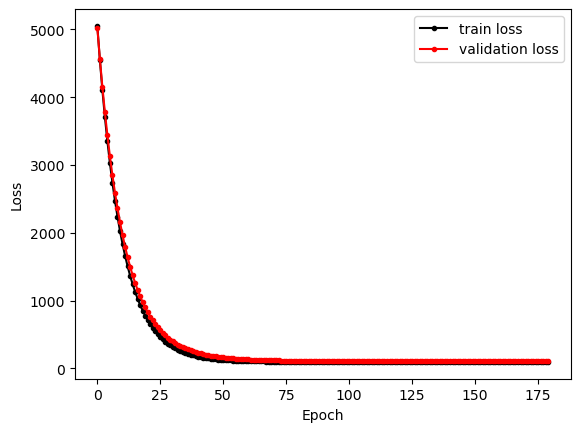

Final train loss: 95.39826965332031
Final test loss: 103.42346954345703


,loss,val_loss
0,5050.480957,5024.232422
1,4552.585938,4568.771973
2,4107.851074,4154.602539
3,3709.115967,3779.979004
4,3350.184814,3437.812500
5,3026.521240,3126.230225
6,2736.890381,2845.748779
7,2474.854736,2592.625977
8,2239.360107,2363.428223
9,2027.029541,2156.189941


In [73]:
#SGD
#Batch size 4, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=180,
  batch_size=64,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

EPOCHS | BATCH | OPTIMIZER | LEARNING RATE | VAL LOSS
-|-|-|-|-
10|1|Adam|0.01|126.35
10|8|Adam|0.01|3179.30
10|8|Adam|0.1|143.66
15|8|Adam|0.1|119.46
60|8|Adam|0.01|102.55
30|4|Adam|0.01|104.56
150|15|Adam|0.01|103.03
10|10|SGD|0.001|126
20|10|SGD|0.001|104.80
100|32|SGD|0.001|103.28
150|64|SGD|0.001|103.42




## Evaluate

Epoch 1/60
207/207 [==============================] - 0s 991us/step - loss: 5173.8311 - val_loss: 5243.2095
Epoch 2/60
207/207 [==============================] - 0s 681us/step - loss: 4864.0146 - val_loss: 4989.9951
Epoch 3/60
207/207 [==============================] - 0s 679us/step - loss: 4582.8320 - val_loss: 4738.4561
Epoch 4/60
207/207 [==============================] - 0s 673us/step - loss: 4317.1216 - val_loss: 4492.8452
Epoch 5/60
207/207 [==============================] - 0s 701us/step - loss: 4060.4307 - val_loss: 4252.1475
Epoch 6/60
207/207 [==============================] - 0s 692us/step - loss: 3816.1558 - val_loss: 4017.4641
Epoch 7/60
207/207 [==============================] - 0s 652us/step - loss: 3585.2246 - val_loss: 3793.7683
Epoch 8/60
207/207 [==============================] - 0s 644us/step - loss: 3362.2380 - val_loss: 3584.9143
Epoch 9/60
207/207 [==============================] - 0s 651us/step - loss: 3149.2605 - val_loss: 3379.2090
Epoch 10/60
207/207 [=======

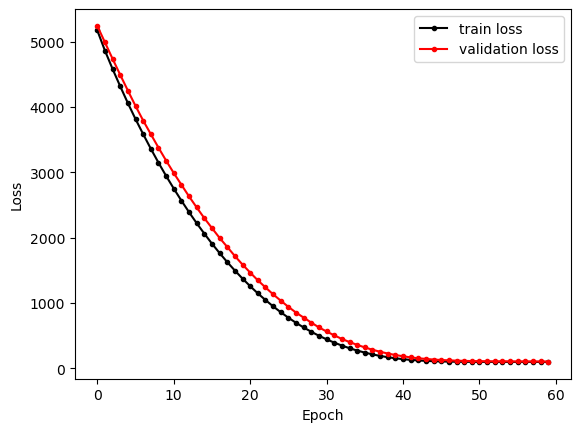

Final train loss: 97.09716033935547
Final test loss: 102.48133087158203


,loss,val_loss
0,5173.831055,5243.209473
1,4864.014648,4989.995117
2,4582.832031,4738.456055
3,4317.121582,4492.845215
4,4060.430664,4252.147461
5,3816.155762,4017.464111
6,3585.224609,3793.768311
7,3362.238037,3584.914307
8,3149.260498,3379.208984
9,2945.901367,3180.435059


In [74]:
#Batch size 8, 60 epochs, Adam Optimizer
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=60,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

In [75]:
test_results = model.evaluate(
    X_test_scaled,
    y_test, verbose=0)

print("MSE for test data:")
print(test_results)

MSE for test data:
83.01399230957031


# Baseline Model using Average Metacritic Score

In [37]:
# Baseling model to check MSE for data
avg_metacritic = np.mean(y_train)

def baseline_pred(col_num):
    return (np.ones(col_num)*avg_metacritic)

y_pred_train = baseline_pred(len(y_train))
y_pred_test = baseline_pred(len(y_test))

def MSE_baseline(predictions, outputs):
    diff = predictions - outputs
    MSE = (diff**2).sum()/len(predictions)
    return MSE

MSE_train_baseline = MSE_baseline(y_pred_train, y_train)
MSE_test_baseline = MSE_baseline(y_pred_test, y_test)

print("MSE of for the baseline on the training data: ", round(MSE_train_baseline,2))
print("MSE of for the baseline on the test data: ", round(MSE_test_baseline,2))

MSE of for the baseline on the training data:  128.01
MSE of for the baseline on the test data:  106.63


Text(0.5, 1.0, 'Histogram of Metacritic Score')

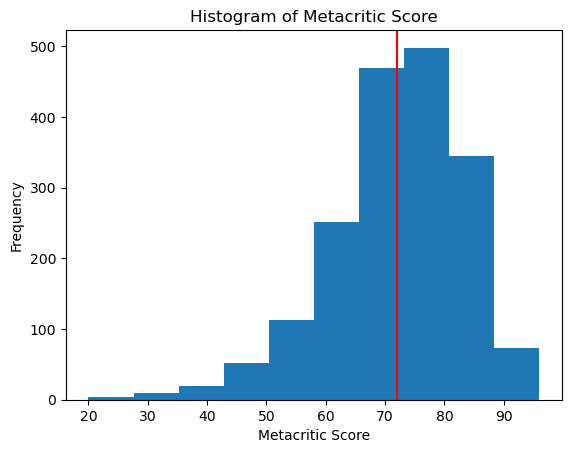

In [41]:
plt.hist(y_train)
plt.axvline(y_train.mean(), color='red')
plt.xlabel("Metacritic Score")
plt.ylabel("Frequency")
plt.title("Histogram of Metacritic Score")